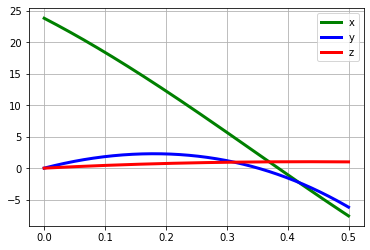

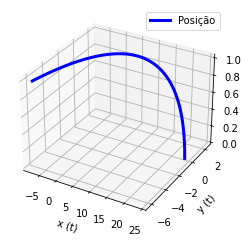

In [48]:
# CHUTAR BOLA CANTO


import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gravidade
g = 9.8

# Tempo inicial e final
ti = 0
tf = 0.5

# Massa
m = 0.45
r = 0.11
A = np.pi * r ** 2
P_ar = 1.225

# Velocidade terminal (paraquedas fechado)
vtx = 100 * 1000 / 3600
vty = 100 * 1000 / 3600
vtz = 100 * 1000 / 3600

# Velocidade inicial
v0 = 100 * 1000 / 3600
alpha = 10

xx0 = 23.8
xy0 = 0
xz0 = 0

vx0 = -50
vy0 = 25
vz0 = 5

wx = 0
wy = 0
wz = 400

# Aceleração
ax = 0
ay = 0
az = -g


# Aceleração
Dx = g / (vtx * np.abs(vtx))
Dy = g / (vty * np.abs(vty))
Dz = g / (vtz * np.abs(vtz))


# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)
xy = np.empty(n + 1)
vy = np.empty(n + 1)
ay = np.empty(n + 1)
xz = np.empty(n + 1)
vz = np.empty(n + 1)
az = np.empty(n + 1)

# Introduzir v0 no vetor velocidade
xx[0] = xx0
vx[0] = vx0
xy[0] = xy0
vy[0] = vy0
vz[0] = xz0
vz[0] = vz0



# Preencher o vetor v
for i in range(n):
    # v0 aqui é a velocidade inicial desde o ultimo ponto
    #   v    =  v0  + a * t
    vTotal = np.sqrt(vx[i] ** 2 + vy[i] ** 2 + vz[i] ** 2)
    
    
    mag = 0.5 * P_ar * r * np.pi * (r ** 2)
    
    amx = - mag * wz * vy[i] / m
    ax[i] = - Dx * vTotal * np.abs(vx[i]) + amx
    xx[i + 1] = xx[i] + vx[i] * dt
    vx[i + 1] = vx[i] + ax[i] * dt
    
    amy = mag * wz * vx[i] / m
    ay[i] = - Dy * vTotal * np.abs(vy[i]) + amy
    xy[i + 1] = xy[i] + vy[i] * dt
    vy[i + 1] = vy[i] + ay[i] * dt
    
    az[i] = - Dz * vTotal * np.abs(vz[i]) - g
    xz[i + 1] = xz[i] + vz[i] * dt
    vz[i + 1] = vz[i] + az[i] * dt
    

    

# Plot
plt.plot(t, xx, label="x",  linestyle='-', linewidth=3, color="green")
plt.plot(t, xy, label="y",  linestyle='-', linewidth=3, color="blue")
plt.plot(t, xz, label="z",  linestyle='-', linewidth=3, color="red")
plt.legend()         # Legenda só aparece com isto
plt.grid()


    
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111, projection ='3d')

ax.plot(xx, xy, xz, label="Posição",  linestyle='-', linewidth=3, color="blue")

plt.xlabel("x (t)")
plt.ylabel("y (t)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
    